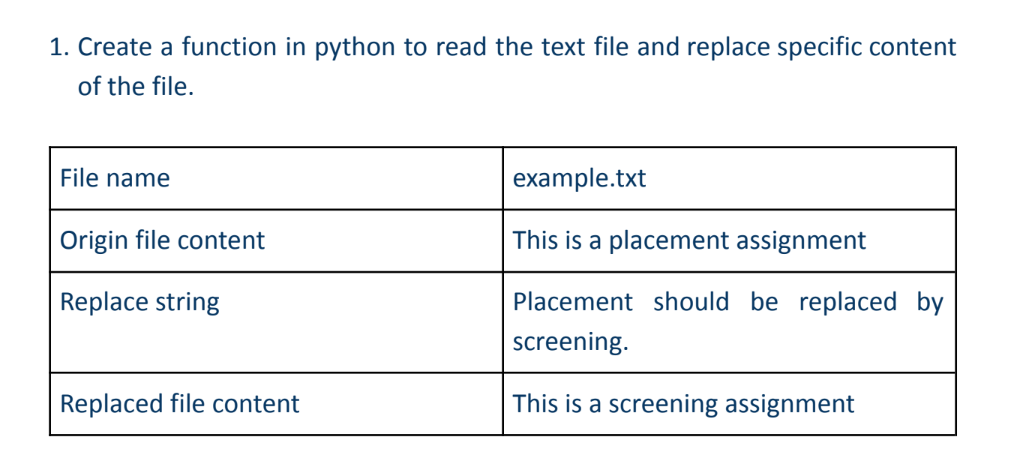

In [5]:
# original
def replace_txt():
    '''
    Ask user for filename, text to replace and replacement text and
    make the replacement
    '''
    while True:
        try:
            # check if filename valid
            f_name = input("Enter file name:")
            with open(f_name,'r+') as f:
                content = f.read()
                print(f"Original content:{content}")
                while True:
                    text_to_be_replaced = input("Enter text to replaced:")
                    # check if text to be replaced exists in the file
                    if text_to_be_replaced in content:
                        text_to_replace_with = input("Enter text that will replace:")

                        # open file now in write mode and 
                        with open(f_name,'w+') as f:
                            f.write(content.replace(text_to_be_replaced,text_to_replace_with))
                            # Just for verification reading from file
                        with open(f_name,'r') as f:
                            content = f.read()
                            print(content)
                        print(f"Modified content:{content}")
                        break
                    else:
                        print(f"String :'{text_to_be_replaced}' doesn't exist in the file: '{f_name}'")
                break
        except Exception as e:
            print(e)
            
                
        

In [6]:
replace_txt()

Enter file name:example.txt
Original content:This is placement  assignment.
Enter text to replaced:placement
Enter text that will replace:screening
This is screening  assignment.
Modified content:This is screening  assignment.


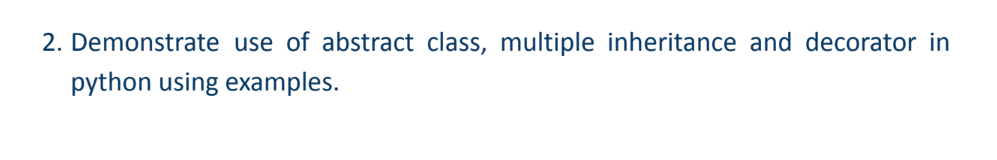

# Abstract class
                
        

Abstract class is used to imposes on its sub classess to provide certain methods. This helps us to impose certain standard in our class definition practice. 

In [18]:
from abc import ABC, abstractmethod
class Computer(ABC):
    @abstractmethod
    def Performance_Analysis(self):
        return 0

In [21]:
class Laptop(Computer):
    def __init__(self):
        self.cpu = "i5"
        self.gpu = "GTX 1650"
        
    def Performance_Analysis(self):
        return self.cpu +" "+ self.gpu
comp_1 = Laptop()
comp_1.Performance_Analysis()

'i5 GTX 1650'

In [22]:
class Mobile_Phone(Computer):
    def __init__(self):
        self.cpu = "SnapDragon"
        self.gpu = ""     
        
comp_2 = Mobile_Phone()


TypeError: Can't instantiate abstract class Mobile_Phone with abstract method Performance_Analysis

This makes it mandatory for us to define method call Peromance for every subclass of Computer, here Laptop and Mobile_phone 

# Multiple Inheritance

Application takes attributes and methods from multiple classes. Here I define two class Student and Sportsman

In [23]:
class Student():
    def __init__(self, name, age, standard):
        self.name = name
        self.age = age
        self.standard = standard
    
    def skills(self):
        print("Good in Maths, Science and Programming")

In [25]:
class Sportsman():
    def __init__(self, name, age, sports):
        self.name = name
        self.age = age
    
    def skills(self):
        print(f"Good in Athletics and Basic fitness")

In [28]:
class School_football_team(Student,Sportsman ):
    def skills(self):
        Sportsman.skills(self)
        Student.skills(self)
        print("Good in football")

In [30]:
school_football_player = School_football_team("rohan",14,'X')
school_football_player.skills()

Good in Athletics and Basic fitness
Good in Maths, Science and Programming
Good in football


The school football player inherits properties of both student and  Sportsman

# Decorator

Decorators add a wrapper around a function or a method, thus modifying the behaviour of the function,

Here I am using it to add time of execution of a function <br>
Here we are calculating L2 distance using looping over each pixel vs using the numpy.array

In [88]:
import numpy as np
# defining a decorator call time_it
def time_it(func):
    def timer(*args):
        start = np.datetime64('now')
        func(*args)
        fin = np.datetime64('now')
        print(f"Operation Duration:{fin - start}")
    return timer

In [89]:
# Used to load images
import cv2 

# load the images
image1 = cv2.imread("img_1.jpeg").astype(np.int32)
image2 = cv2.imread("img_2.jpeg").astype(np.int32)


# Define the function that implements the loop version
@time_it
def l2_loop(image1, image2):
    height, width, channels = image1.shape
    distance = 0
    
    for h in range(height):
        for w in range(width):
            for c in range(channels):
                distance += (image1[h][w][c] - image2[h][w][c])**2

# Define the vectorised version
@time_it
def l2_vectorise(image1, image2):
    ((image1 - image2)**2).sum()

In [90]:
l2_loop(image1,image2)

C:\Users\hites\AppData\Local\Temp/ipykernel_24804/2437300513.py:18: RuntimeWarning: overflow encountered in long_scalars
  distance += (image1[h][w][c] - image2[h][w][c])**2


Operation Duration:6 seconds


In [91]:
l2_vectorise(image1, image2)

Operation Duration:0 seconds


In [ ]:
# 